In [1]:
import sqlalchemy as sq
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
engine = sq.create_engine("sqlite:///data/covid_db.sqlite")
cnx = engine.connect()

In [4]:
meta = sq.MetaData()
meta.reflect(bind=engine)

In [5]:
meta.tables.keys()

dict_keys(['covid_states', 'covid_world', 'vax_usa'])

In [24]:
usa_df = pd.read_csv(
    "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
)
usa_vax = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv').rename({'location':'state'}, axis=1)
usa_vax['state'] = usa_vax['state'].str.replace('New York State', 'New York')
usa_df2 = usa_df.merge(usa_vax, on=['date','state'])

In [32]:
def check_states(df1, df2):
    states1 = df1['state'].unique()
    states2 = df2['state'].unique()
    
    for state in states1:
        if state not in states2:
            print(f"df2 doesn't have {state}")
            
    for state in states2:
        if state not in states1:
            print(f"df1 doesn't have {state}")

In [33]:
check_states(usa_df, usa_vax)

df1 doesn't have American Samoa
df1 doesn't have Bureau of Prisons
df1 doesn't have Dept of Defense
df1 doesn't have Federated States of Micronesia
df1 doesn't have Indian Health Svc
df1 doesn't have Long Term Care
df1 doesn't have Marshall Islands
df1 doesn't have Republic of Palau
df1 doesn't have United States
df1 doesn't have Veterans Health


In [6]:
df = pd.read_sql('covid_states',con=cnx)
df['date'] = pd.to_datetime(df['date'])

In [36]:
def cat_state(my_string):
    regions = {
        'northeast':['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                     'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
        'midwest':['Illinois', 'Indiana', 'Michigan', 'Ohio', 
                   'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 
                   'Nebraska', 'North Dakota','South Dakota'],
        'south':['Delaware', 'Florida', 'Georgia', 'Maryland',
                 'North Carolina', 'South Carolina', 'Virginia', 
                 'District of Columbia', 'West Virginia', 'Alabama', 
                 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 
                 'Louisiana', 'Oklahoma', 'Texas'],
        'west':['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada',
                'New Mexico', 'Utah', 'Wyoming', 'Alaska', 
                'California', 'Hawaii', 'Oregon', 'Washington']
    }

    for r in regions.keys():
        if my_string in regions[r]:
            return r

In [40]:
df['region'] = df['state'].apply(cat_state)

In [13]:
for region in regions.keys():
    for state in regions[region]:
        if state not in df['state'].unique():
            print(state)

New York


In [15]:
states = list(df['state'].unique())
states.sort()

In [16]:
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [8]:
yesterday = dt.datetime.now().date() - dt.timedelta(days=1)
col = 'one_dose_vaccinated_per_hundred'
df[df.date.apply(lambda x: True if x.date() == yesterday else False)].sort_values(col, ascending=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,date,state,fips,cases,deaths,total_vaccinations,total_distributed,one_dose_vaccinated,all_doses_vaccinated_per_hundred,total_vaccinations_per_hundred,...,share_doses_used,pop,new_cases,weekly_rolling_new_cases,new_deaths,weekly_rolling_new_deaths,cases_per_100k,deaths_per_100k,weekly_rolling_new_cases_per_100k,weekly_rolling_new_deaths_per_100k
8371,2021-07-12,Vermont,50,24489,258,860701.0,931580.0,465236.0,66.49,137.94,...,0.924,623989,32.0,10.000000,0.0,0.000000,3924.588414,41.346883,1.602592,0.000000
4003,2021-07-12,Massachusetts,25,711162,18012,8964786.0,9829100.0,4910031.0,62.67,130.07,...,0.912,6892503,332.0,146.285714,1.0,2.000000,10317.906282,261.327416,2.122389,0.029017
2183,2021-07-12,Hawaii,15,37025,518,1697443.0,1956710.0,997059.0,52.64,119.89,...,0.867,1415872,0.0,54.142857,0.0,0.428571,2614.996271,36.585228,3.823994,0.030269
1273,2021-07-12,Connecticut,9,350039,8279,4478450.0,4783225.0,2424309.0,61.80,125.61,...,0.936,3565287,70.0,80.428571,0.0,0.000000,9817.975383,232.211320,2.255879,0.000000
3639,2021-07-12,Maine,23,69219,862,1634116.0,1874270.0,901684.0,62.42,121.57,...,0.872,1344212,0.0,14.428571,0.0,0.285714,5149.410956,64.126790,1.073385,0.021255
7097,2021-07-12,Puerto Rico,72,174462,2555,3837957.0,4236710.0,2124151.0,57.68,120.17,...,0.906,3193694,139.0,78.000000,1.0,0.428571,5462.702438,80.001403,2.442313,0.013419
7279,2021-07-12,Rhode Island,44,152819,2731,1296707.0,1528665.0,693578.0,59.98,122.40,...,0.848,1059361,90.0,25.142857,1.0,0.142857,14425.582969,257.796917,2.373398,0.013485
5641,2021-07-12,New Jersey,34,1026286,26509,10041464.0,11723135.0,5678062.0,56.43,113.05,...,0.857,8882190,215.0,282.142857,4.0,4.571429,11554.425204,298.451170,3.176501,0.051467
5823,2021-07-12,New Mexico,35,206551,4360,2423811.0,2396705.0,1338350.0,55.74,115.59,...,1.011,2096829,299.0,119.428571,4.0,2.000000,9850.636366,207.933026,5.695675,0.095382
6915,2021-07-12,Pennsylvania,42,1218886,27791,14139778.0,15853755.0,8157566.0,50.73,110.45,...,0.892,12801989,237.0,199.142857,1.0,5.571429,9521.067390,217.083455,1.555562,0.043520


In [82]:
df.date[1] == dt.datetime.now()

<IPython.core.display.Javascript object>

False

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9282 entries, 0 to 9281
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                9282 non-null   datetime64[ns]
 1   state                               9282 non-null   object        
 2   fips                                9282 non-null   int64         
 3   cases                               9282 non-null   int64         
 4   deaths                              9282 non-null   int64         
 5   total_vaccinations                  8976 non-null   float64       
 6   total_distributed                   8976 non-null   float64       
 7   one_dose_vaccinated                 8966 non-null   float64       
 8   all_doses_vaccinated_per_hundred    8914 non-null   float64       
 9   total_vaccinations_per_hundred      8976 non-null   float64       
 10  all_doses_vaccinated    

In [62]:
df[df['state'] == 'Ohio']

,date,state,fips,cases,deaths,total_vaccinations,total_distributed,one_dose_vaccinated,all_doses_vaccinated_per_hundred,total_vaccinations_per_hundred,...,share_doses_used,pop,new_cases,weekly_rolling_new_cases,new_deaths,weekly_rolling_new_deaths,cases_per_100k,deaths_per_100k,weekly_rolling_new_cases_per_100k,weekly_rolling_new_deaths_per_100k
6188,2021-01-12,Ohio,39,792938,9802,311890.0,866050.0,311867.0,NaN,2.67,...,0.360,11689100,NaN,NaN,NaN,NaN,6783.567597,83.855900,NaN,NaN
6189,2021-01-13,Ohio,39,799639,9881,329318.0,957700.0,329295.0,NaN,2.82,...,0.344,11689100,6701.0,NaN,79.0,NaN,6840.894509,84.531743,NaN,NaN
6190,2021-01-14,Ohio,39,807293,9990,348424.0,967450.0,338961.0,NaN,2.98,...,0.360,11689100,7654.0,NaN,109.0,NaN,6906.374315,85.464236,NaN,NaN
6191,2021-01-15,Ohio,39,814442,10057,375428.0,968250.0,361818.0,0.12,3.21,...,0.388,11689100,7149.0,NaN,67.0,NaN,6967.533856,86.037419,NaN,NaN
6192,2021-01-16,Ohio,39,821507,10135,NaN,NaN,NaN,NaN,NaN,...,NaN,11689100,7065.0,NaN,78.0,NaN,7027.974780,86.704708,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6365,2021-07-08,Ohio,39,1113383,20366,10791040.0,12468315.0,5677337.0,45.28,92.32,...,0.865,11689100,377.0,211.428571,0.0,8.142857,9524.967705,174.230694,1.808767,0.069662
6366,2021-07-09,Ohio,39,1113737,20380,10806914.0,12499485.0,5683665.0,45.36,92.45,...,0.865,11689100,354.0,235.571429,14.0,5.142857,9527.996167,174.350463,2.015309,0.043997
6367,2021-07-10,Ohio,39,1114036,20380,10819638.0,12518485.0,5689138.0,45.42,92.56,...,0.864,11689100,299.0,249.571429,0.0,5.142857,9530.554106,174.350463,2.135078,0.043997
6368,2021-07-11,Ohio,39,1114267,20380,10835735.0,12518485.0,5696098.0,45.50,92.70,...,0.866,11689100,231.0,282.571429,0.0,5.142857,9532.530306,174.350463,2.417393,0.043997


In [38]:
df = df.merge(df2)

<AxesSubplot:xlabel='date', ylabel='people_vaccinated_per_hundred'>

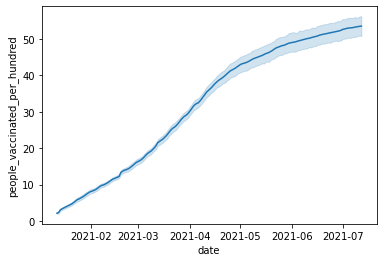

In [43]:
sns.lineplot(x='date',y='people_vaccinated_per_hundred', data=df[df['state']=='Ohio'])

In [11]:
vax_cols = [col for col in df.columns if 'vacc' in col]
cols = ['iso_code', 'continent', 'location', 'date'] + vax_cols

In [12]:
vax_cols

['total_vaccinations',
 'one_dose_vaccinated',
 'all_doses_vaccinated',
 'total_vaccinations_per_hundred',
 'one_dose_vaccinated_per_hundred',
 'all_doses_vaccinated_per_hundred']

In [13]:
new_name = {
     'people_vaccinated':'one_dose_vaccinated',
     'people_fully_vaccinated':'all_doses_vaccinated',
     'new_vaccinations':'new_doses_administered',
     'new_vaccinations_smoothed':'new_doses_administered_smoothed',
     'people_vaccinated_per_hundred':'one_dose_vaccinated_per_hundred',
     'people_fully_vaccinated_per_hundred':'all_doses_vaccinated_per_hundred',
     'new_vaccinations_smoothed_per_million':'new_doses_administered_smoothed_per_million'
}

[Source](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv) for what the columns represent

In [14]:
vax_df = df[cols]
vax_df = vax_df.rename(new_name, axis=1)

In [15]:
small_df = vax_df[(vax_df['location']=='United States') |
                  (vax_df['location']=='Canada') |
                  (vax_df['location']=='Hungary')
                 ]

<AxesSubplot:xlabel='date', ylabel='one_dose_vaccinated_per_hundred'>

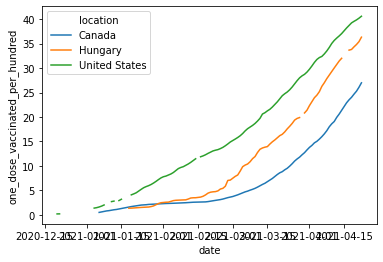

In [16]:
sns.lineplot(x='date',y='one_dose_vaccinated_per_hundred', 
             data=small_df, 
             hue='location')

In [15]:
df.to_sql('vax_usa', cnx)